## 1) 데이터셋 분할하기

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io


# Functions for converting value into a form corresponding to tf.Example
def _bytes_feature(value):
  """Takes a string/byte type and returns a byte list."""
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Takes a float / double type and returns a list of floats."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Takes bool/enum/int/uint type and returns int64 list."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

print(_bytes_feature(b'test_string'))
'''
bytes_list {
  value: "test_string"
}
'''
print(_bytes_feature(u'test_bytes'.encode('utf-8')))
'''
bytes_list {
  value: "test_bytes"
}
'''
print(_float_feature(np.exp(1)))
'''
float_list {
  value: 2.71828174591
}
'''
print(_int64_feature(True))
'''
int64_list {
  value: 1
}
'''
print(_int64_feature(1))
'''
int64_list {
  value: 1
}
'''

bytes_list {
  value: "test_string"
}

bytes_list {
  value: "test_bytes"
}

float_list {
  value: 2.7182817459106445
}

int64_list {
  value: 1
}

int64_list {
  value: 1
}



'\nint64_list {\n  value: 1\n}\n'

In [ ]:
np.exp(1)

2.718281828459045

In [ ]:
# You can convert it to a binary string using the SerializeToString function.
feature = _float_feature(np.exp(1))
print(type(feature))
feature

<class 'tensorflow.core.example.feature_pb2.Feature'>


float_list {
  value: 2.7182817459106445
}

In [ ]:
print(feature.SerializeToString())

b'\x12\x06\n\x04T\xf8-@'


In [ ]:
def serialize_example(feature0, feature1, feature2, feature3):
  """
  Generates a tf.Example message for writing to a file.
  """

  # key   - feature name
  # value - Types suitable for tf.Example
  # Create a dictionary of the form above.
  feature = {
      'feature0': _int64_feature(feature0),
      'feature1': _int64_feature(feature1),
      'feature2': _bytes_feature(feature2),
      'feature3': _float_feature(feature3),
  }

  # Create Features message using tf.train.Example.
  example_proto = tf.train.Example(features=tf.train.Features(feature=feature))

  return example_proto.SerializeToString()

In [ ]:
# Serialize to binary string using serialize_example function.
serialized_example = serialize_example(False, 4, b'goat', 0.9876)
print(serialized_example)

b'\nR\n\x14\n\x08feature3\x12\x08\x12\x06\n\x04[\xd3|?\n\x11\n\x08feature1\x12\x05\x1a\x03\n\x01\x04\n\x11\n\x08feature0\x12\x05\x1a\x03\n\x01\x00\n\x14\n\x08feature2\x12\x08\n\x06\n\x04goat'


In [ ]:
# Decode the serilized data using the tf.train.Example.FromString method.
example_proto = tf.train.Example.FromString(serialized_example)
print(example_proto)

features {
  feature {
    key: "feature0"
    value {
      int64_list {
        value: 0
      }
    }
  }
  feature {
    key: "feature1"
    value {
      int64_list {
        value: 4
      }
    }
  }
  feature {
    key: "feature2"
    value {
      bytes_list {
        value: "goat"
      }
    }
  }
  feature {
    key: "feature3"
    value {
      float_list {
        value: 0.9876000285148621
      }
    }
  }
}



In [ ]:
filename = 'test.tfrecord'

# number of observations
numbers_observations = int(1e4)

# boolean feature - [False or True]
feature0 = np.random.choice([False, True], numbers_observations)

# integer feature - [0 .. 4]
feature1 = np.random.randint(0, 5, numbers_observations)

# string feature
strings = np.array([b'cat', b'dog', b'chicken', b'horse', b'goat'])
feature2 = strings[feature1]
# print(len(feature2))
# float feature - from standard normal distribution
feature3 = np.random.randn(numbers_observations)


# Write the tf.Example data to the tfrecord file.
with tf.io.TFRecordWriter(filename) as writer:
  for i in range(numbers_observations):
    example = serialize_example(feature0[i], feature1[i], feature2[i], feature3[i])
    writer.write(example)

In [ ]:
record_iterator = tf.data.TFRecordDataset(filename)

for string_record in record_iterator:
  example = tf.train.Example()
  example.ParseFromString(string_record.numpy())

  print(example)

  # For testing purposes, only the first value is printed and exited.
  break

# example object is mapped in the form of a python dictionary.
print(dict(example.features.feature))

In [ ]:
print(example.features.feature['feature3'])
'''
float_list {
  value: 1.63795161247
}
'''
print(example.features.feature['feature3'].float_list.value)
'''
[1.6379516124725342]
'''

float_list {
  value: 0.2686830461025238
}

[0.2686830461025238]


'\n[1.6379516124725342]\n'

In [ ]:
# Download the sample image and display it on the screen.
cat_in_snow  = tf.keras.utils.get_file('320px-Felis_catus-cat_on_snow.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')
williamsburg_bridge = tf.keras.utils.get_file('194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/194px-New_East_River_Bridge_from_Brooklyn_det.4a09796u.jpg')



15477/15477 [==============================] - 0s 0us/step


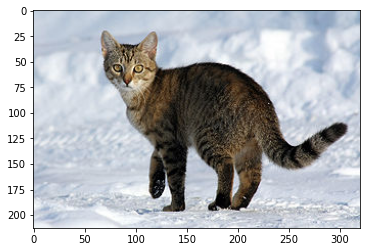

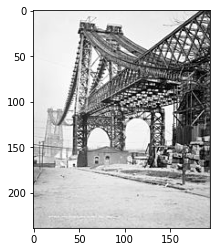

In [ ]:
cat_in_snow_image = Image.open(cat_in_snow)
plt.imshow(cat_in_snow_image)
plt.show()

williamsburg_bridge_image = Image.open(williamsburg_bridge)
plt.imshow(williamsburg_bridge_image, cmap='gray')
plt.show()

In [ ]:
# As an example, 
# save the image information (hegiht, widht, depth, image_raw) and label information (label) of the cat image.
image_labels1 = {
    cat_in_snow : 0,
    williamsburg_bridge : 1,
}

image_binary1 = open(cat_in_snow, 'rb').read()
label1 = image_labels1[cat_in_snow]

In [ ]:
# Constructs appropriate dictionary values.
def image_example1(image_binary, label):
  image_shape = tf.image.decode_jpeg(image_binary).shape

  feature = {
      'height': _int64_feature(image_shape[0]),
      'width': _int64_feature(image_shape[1]),
      'depth': _int64_feature(image_shape[2]),
      'label': _int64_feature(label),
      'image_raw': _bytes_feature(image_binary),
  }

  return tf.train.Example(features=tf.train.Features(feature=feature))

In [ ]:
# The stored values are output up to the 15th line.
for line in str(image_example1(image_binary1, label1)).split('\n')[:15]:
  print(line)
print('...')

# Save the example images (cat, bridge) to the images.tfrecords file.
with tf.io.TFRecordWriter('images1.tfrecords') as writer:
  for filename, label in image_labels1.items():
    image_string = open(filename, 'rb').read()
    tf_example = image_example1(image_string, label)
    writer.write(tf_example.SerializeToString())

features {
  feature {
    key: "depth"
    value {
      int64_list {
        value: 3
      }
    }
  }
  feature {
    key: "height"
    value {
      int64_list {
        value: 213
      }
...


In [ ]:
# Create a dictionary describing the features.
image_feature_description1 = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
  # Parse tf.Example.
  return tf.io.parse_single_example(example_proto, image_feature_description1)

<MapDataset element_spec={'depth': TensorSpec(shape=(), dtype=tf.int64, name=None), 'height': TensorSpec(shape=(), dtype=tf.int64, name=None), 'image_raw': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'width': TensorSpec(shape=(), dtype=tf.int64, name=None)}>
height : 213
width : 320
depth : 3


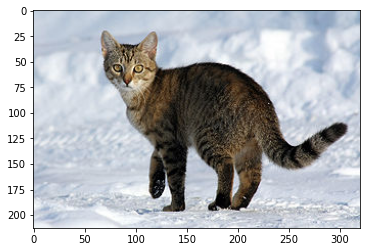

height : 239
width : 194
depth : 1


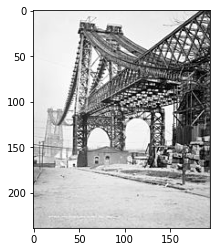

In [ ]:
# Create tf.data.TFRecordDataset
raw_image_dataset = tf.data.TFRecordDataset('images1.tfrecords')
parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
print(parsed_image_dataset)

for image_features in parsed_image_dataset:
  print('height :', image_features['height'].numpy())
  print('width :', image_features['width'].numpy())
  print('depth :', image_features['depth'].numpy())

  encoded_jpg_io = io.BytesIO(image_features['image_raw'].numpy())
  image = Image.open(encoded_jpg_io)
  if image_features['depth'].numpy() == 1:
    plt.imshow(image, cmap='gray')
    plt.show()
  else:
    plt.imshow(image)
    plt.show()

GitHub에서는 GitHub REST API 와 GitHub Content API를 제공한다. 원격 저장소처럼 Git에 올라와있는 파일들을 다운로드 받을 수 있다.

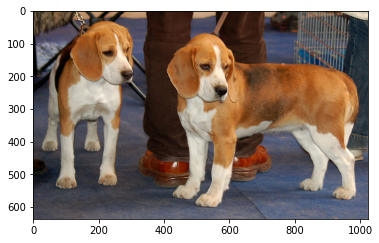

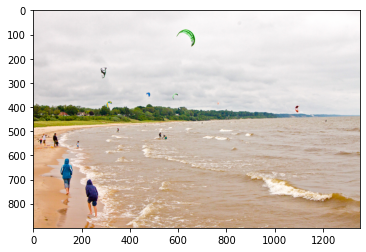

In [ ]:
dog  = tf.keras.utils.get_file('image1.jpg', 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/image1.jpg')
beach = tf.keras.utils.get_file('image2.jpg','https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/test_images/image2.jpg')

dog_image = Image.open(dog)
plt.imshow(dog_image)
plt.show()

beach_image = Image.open(beach)
plt.imshow(beach_image)
plt.show()

image_labels = {
    dog : b'dog',
    beach : b'beach',
}


In [ ]:
def image_example(image_binary, label):
  image_shape = tf.image.decode_jpeg(image_binary).shape

  feature = {
      'labels': _bytes_feature(label),
      'two_image': _bytes_feature(image_binary),
  }

  return tf.train.Example(features=tf.train.Features(feature=feature))


with tf.io.TFRecordWriter('tf_example_test.tfrecord') as writer:
  for filename, label in image_labels.items():
    image_string = open(filename, 'rb').read()
    tf_example = image_example(image_string, label)
    writer.write(tf_example.SerializeToString())

<MapDataset element_spec={'labels': TensorSpec(shape=(), dtype=tf.string, name=None), 'two_image': TensorSpec(shape=(), dtype=tf.string, name=None)}>
label : dog


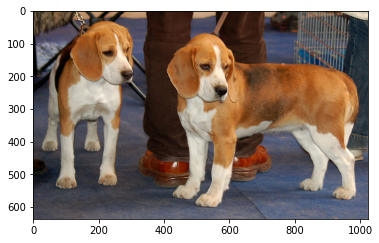

label : beach


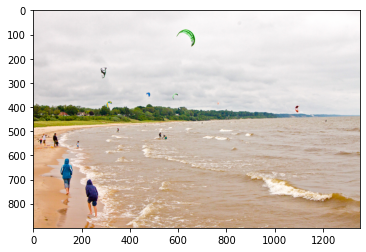

In [ ]:
image_feature_description = {
    'labels': tf.io.FixedLenFeature([], tf.string),
    'two_image': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):  
  return tf.io.parse_single_example(example_proto, image_feature_description)

raw_image_dataset = tf.data.TFRecordDataset('tf_example_test.tfrecord')
parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
print(parsed_image_dataset)

for image_features in parsed_image_dataset:
  print('label :', image_features['labels'].numpy().decode())

  encoded_jpg_io = io.BytesIO(image_features['two_image'].numpy())
  image = Image.open(encoded_jpg_io)
  plt.imshow(image)
  plt.show()